<a href="https://colab.research.google.com/github/Amakudegloria/Divvy-Bike-Share-Analysis-Python/blob/master/Divvy_Bike_share_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

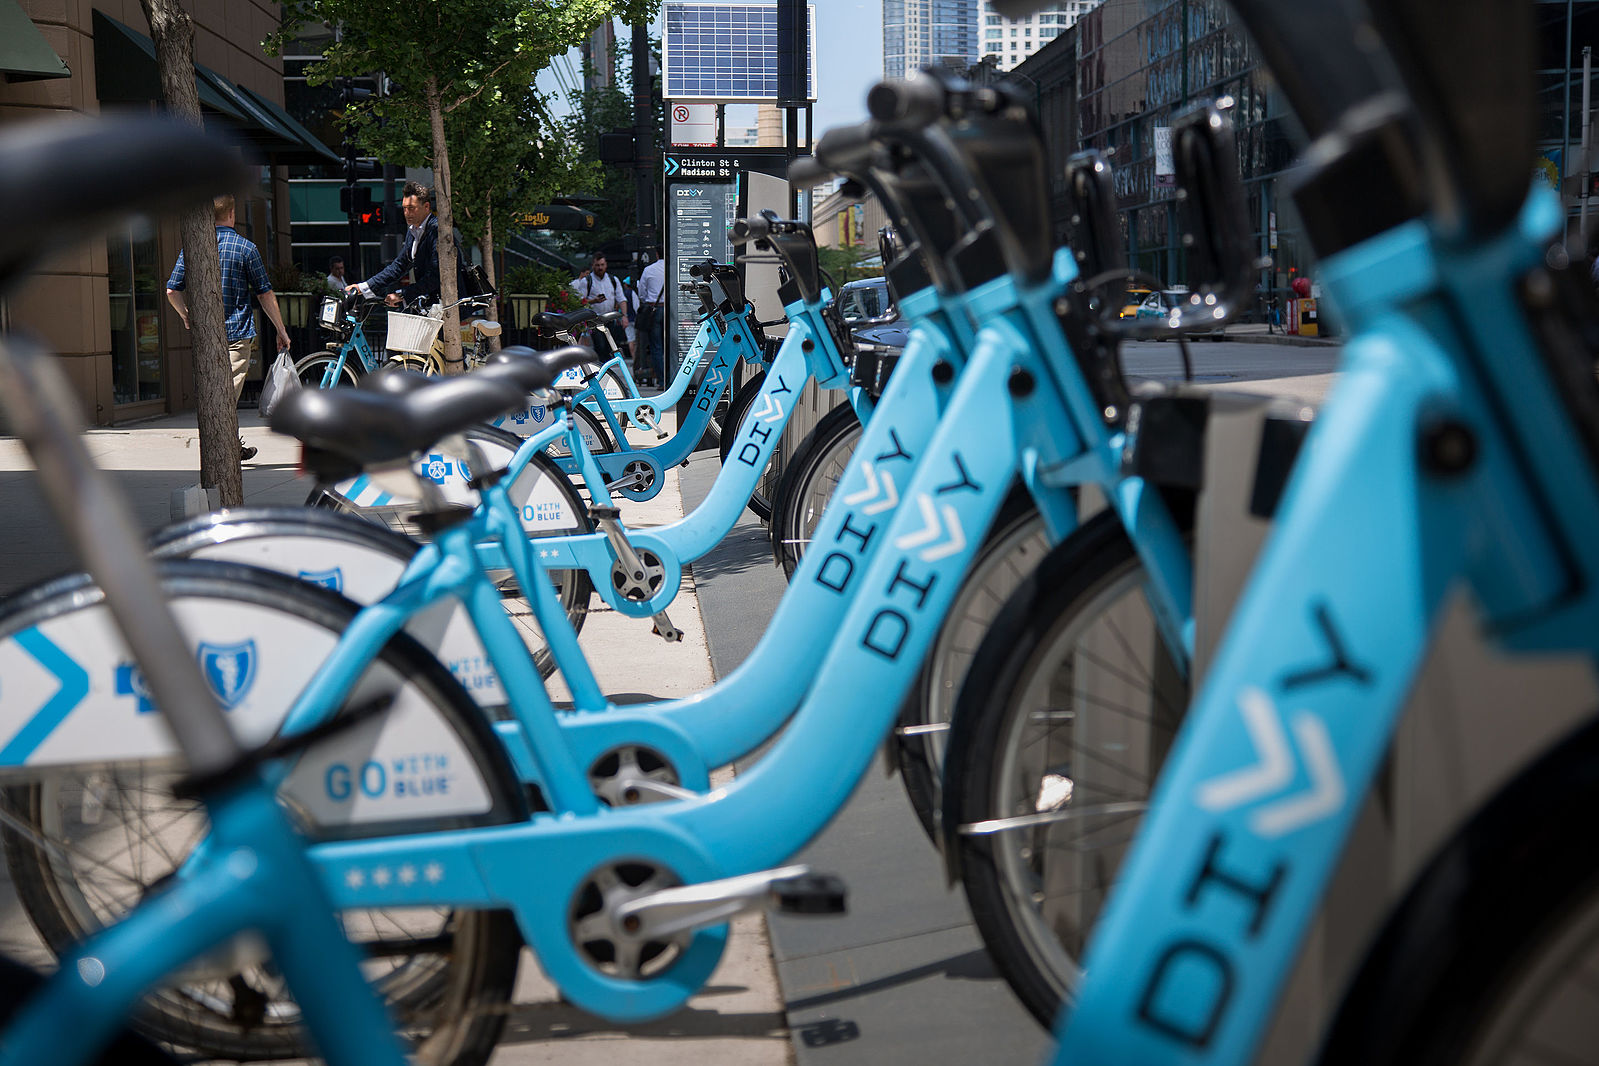

#**Divvy Bike Share**
Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. With the latest technologies, it is easy for a user to access a dock within the system and unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will perform an exploratory analysis on data provided by Divvy, a bike-share system provider for many major cities in the United States. I will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. I will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

Let us start by asking questions we might want to understand about the bike share data. Such as; What kinds of information would we want to know in order to make smarter business decisions?

1. which month has the most bike usage?
2. On which particularly day/week of the month do our users use the bike most?
3. which day of the week do the users use the bike most?
4. On which hour of day do we have the most users ?
5. What is our most common start station?
6. What is the most frequent trip (i.e., most frequent combination of start station and end station)?
7. What is the overall travel time so far?
8. What is the Average travel time so far?
9. What are the various User Types and their Trip Durations.
10. gender and age distribution of Users.




# **Import Packages**

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import calendar
import datetime
import random
import statistics
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-pastel')
sns.set_style('whitegrid')
sns.set_context('paper')
%matplotlib inline
from dateutil.relativedelta import relativedelta

# **Data Wrangling**


## **Chicago data**

In [ ]:
#Now lets have a look at the dataset
chicago_df = pd.read_csv('https://github.com/Amakudegloria/US-Bike-Share-Analysis-Python/blob/master/chicago.csv?raw=true')

#looking at the dataset we can find column names with white spaces and uppercase characters. Let's remove them and convert them to lower case
chicago_df.columns = [n.lower().replace(' ', '_') for n in chicago_df.columns]



## **New york city data**

We can do the same for the New york city data 😉.

In [ ]:
## Import file into pandas dataframe
new_york_city_df = pd.read_csv('https://github.com/Amakudegloria/US-Bike-Share-Analysis-Python/blob/master/new_york_city.csv?raw=true')

new_york_city_df.columns = [n.lower().replace(' ', '_') for n in new_york_city_df.columns]


# Display first few rows

##**Washington data**
As we do the same, notice that this dataset has no information on the user's Birth year, so we can ignore this for now.

In [ ]:
washington_df = pd.read_csv('https://github.com/Amakudegloria/US-Bike-Share-Analysis-Python/blob/master/washington.csv?raw=true')
washington_df.columns = [n.lower().replace(' ', '_') for n in washington_df.columns]

In [ ]:
# Then let's concatinate all three datasets one logical data set.
Bike_share_df = pd.concat([chicago_df, washington_df, new_york_city_df])

 

##**Converting to DateTime**
We can convert the dates from strings to a datetime object. Once the dates are converted to a datetime object, we can easily customize the dates and work with data across various timeframes (e.g. daily, monthly, yearly) 

In [ ]:
#Convert start time to DateTime
Bike_share_df['start_time'] = Bike_share_df['start_time'].map(pd.to_datetime)

#Convert end time to DateTime
Bike_share_df['end_time'] = Bike_share_df['end_time'].map(pd.to_datetime)


# **Data Exploration and Analysis**
Now it's time to collect and explore our data!!!

## **Question 1**
In which month do we have the most usage of our bikes?

**Answer**: The most common month is **June**

In [ ]:
#Created a seperate column for month which was extracted from the start time date
Bike_share_df['month'] = Bike_share_df['start_time'].dt.month

#Find the most common month
common_month = Bike_share_df['month'].mode()[0]

#And a seperate column for month name which was also extracted from the start time date
Bike_share_df['month_name'] = Bike_share_df['month'].apply(lambda x: calendar.month_name[x])

#Find and print the most common month name
common_month_name = Bike_share_df['month_name'].mode()[0]
print("The most common month is: {}".format(common_month_name))

The most common month is: June


##**Question 2**
 on which particularly date do we have the most usage of our bikes?

 **Answer**: The most common day of the week is **21**

In [ ]:
#Also let's create a seperate column for day which we will extract from the start time 
Bike_share_df['day'] = Bike_share_df['start_time'].dt.day

#Find the most common day 
common_day = Bike_share_df['day'].mode()[0]

print("The most common day of the week is: {}".format(common_day))

The most common day of the week is: 21


##**Question 3**
which days of the week do our users use the bike most?

**Answer**: The most common weekday is **Wednesday**

In [ ]:
#Again we create a seperate column for weekday which was extracted from the start time 
Bike_share_df['weekday']= Bike_share_df['start_time'].dt.day_name()

common_weekday = Bike_share_df['weekday'].mode()[0]
print("The most common weekday is: {}".format(common_weekday))

The most common weekday is: Wednesday


##**Question 4**
On which hour of the day do we have the most users ?

**Answer**: The most common hour of the day is **8am**

In [ ]:
#Finally let's create another column for hour which we will extract from the start time date

Bike_share_df['hour'] = Bike_share_df['start_time'].dt.hour

common_hour = Bike_share_df['hour'].mode()[0]
print("The most common hour of the day is: {}".format(common_hour))

The most common hour of the day is: 8


##**Question 5**
What is our most common start station?

**Answer**: The most common start station is **Streeter Dr & Grand Ave**

In [ ]:
common_start_station = Bike_share_df['start_station'].mode()[0]

print("The most common start station is: {}".format(common_start_station))

The most common start station is: Streeter Dr & Grand Ave


##**Question 6**
What is our most common end station?

**Answer**: The most common end station is **Streeter Dr & Grand Ave**

In [ ]:
common_end_station = Bike_share_df['end_station'].mode()[0]

print("The most common end_station is: {}".format(common_end_station))

The most common end_station is: Streeter Dr & Grand Ave


##**Question 7**
What is the most frequent trip (i.e., most frequent combination of start station and end station)?

**Answer**: The trip from **Lake Shore Dr & Monroe St** to **Streeter Dr & Grand Ave** is the most frequently occuring.

In [ ]:
#combine both start and end stations to discover user's individual trips
Bike_share_df['combined_stations'] = Bike_share_df['start_station'] + ":" + Bike_share_df['end_station']

#find the most occurring trip
freq_comb_stations = Bike_share_df['combined_stations'].mode()[0]
print("The most common trip from start to end is: {}".format(freq_comb_stations))

The most common trip from start to end is: Lake Shore Dr & Monroe St:Streeter Dr & Grand Ave


##**Question 8**
What is the overall travel time so far?

**Answer**: The total travel time is **15366017.008066665 hours**

In [ ]:
#calculate total travel time (in seconds)
total_tt_secs = Bike_share_df['trip_duration'].sum()

#what is the total travel time in hours
total_tt_hour = total_tt_secs/60
print("The total travel time is: {} hours".format(total_tt_hour))

The total travel time is: 15366017.008066665 hours


##**Question 9**
What is the  Average travel time so far?

**Answer**: **17 hours** is the average travel time 

In [ ]:
#calculate average travel time (in seconds)
avg_tt_secs = Bike_share_df['trip_duration'].mean()

#What is the Average travel time in hours
avg_tt_hour = avg_tt_secs/60
print("The average travel time is: {} hours".format(avg_tt_hour))

The average travel time is: 17.073352231185456 hours


##**Question 10** 
Now that we have gained insights about our users and their travel times. Let's expelore each user types

What are the various User Types and their counts?

**Answer**: 
Total Usage: 899308

Total Subscriber: 728824

Total Customer: 170483

Total Dependent: 1

In [ ]:
#What is the total number of Divvy Bike share users 
Bike_share_df['user_type'].count()

899308

In [ ]:
#what are the unique user types in our data
Bike_share_df['user_type'].nunique()
Bike_share_df['user_type'].unique()
Bike_share_df['user_type'].value_counts()

Subscriber    728824
Customer      170483
Dependent          1
Name: user_type, dtype: int64

In [ ]:
#Are there any missing values for our user types?
Bike_share_df['user_type'].isnull().any()

#Now we know there are missing values for our types let's count them
Bike_share_df['user_type'].isnull().sum()

692

In [ ]:
#just another method to count the unique values for our user type using a for loop 

type_subscriber = 0
type_customer = 0
type_dependent = 0
missing_user_type = 0

for x in Bike_share_df['user_type']:
    if x == 'Subscriber':
        type_subscriber += 1
    elif x == 'Customer':
        type_customer += 1
    elif x == 'Dependent':
        type_dependent += 1
    else:
        missing_user_type += 1
        

print("There are {} Subscriber(s)".format(type_subscriber))
print("There are {} Customer(s)".format(type_customer))
print("There are {} Dependent(s)".format(type_dependent))
print("There are {} missing user types in our dataset".format(missing_user_type))

There are 728824 Subscriber(s)
There are 170483 Customer(s)
There are 1 Dependent(s)
There are 692 missing user types in our dataset


## **Question 11**
Diving deeper we can explore the gender of our various users in order to help develop key strategies and target their individual needs(Data only available for NYC and Chicago)

In [ ]:
#To concatenate the new york and chicago datasets and create a seperate dataframe

NYC_Chicago_df = pd.concat([chicago_df, new_york_city_df])

In [ ]:
NYC_Chicago_df['start_time'] = NYC_Chicago_df['start_time'].map(pd.to_datetime)

NYC_Chicago_df['end_time'] = NYC_Chicago_df['end_time'].map(pd.to_datetime)

NYC_Chicago_df['month'] = NYC_Chicago_df['start_time'].dt.month

NYC_Chicago_df['day'] = NYC_Chicago_df['start_time'].dt.day


In [ ]:
#we would like to check for the unique gender values in our data
NYC_Chicago_df['gender'].unique() #or
gender_count = NYC_Chicago_df['gender'].value_counts()

#Do we have null values here?
NYC_Chicago_df['gender'].isnull().any()

#How many? Let's count them.
NYC_Chicago_df['gender'].isnull().sum()

90261

In [ ]:
#Another way to count the various genders is to use a for loop 
Male_cust = 0
Female_cust = 0
nan_gender = 0

for x in NYC_Chicago_df['gender']:
    if x == 'Male':
        Male_cust += 1
    elif x == 'Female':
        Female_cust += 1
    else :
        nan_gender += 1

print("There are {} Males".format(Male_cust))
print("There are {} Females".format(Female_cust))
print("There are {} missing gender".format(nan_gender))

There are 385198 Males
There are 124541 Females
There are 90261 missing gender


##**Question 12**
Great! We now know the genders, it would also be important to know the different age distribution of our users. What are their ages?
(only available for NYC and Chicago)

## what is the earliest year of birth. What year of birth are our oldest users?
**Answer**: Our oldest users were born in the year **1885**

In [ ]:
Earl_birth_year = NYC_Chicago_df[NYC_Chicago_df['birth_year'] > 0].min()
print("The earliest birth year is: {}".format(Earl_birth_year['birth_year']))

The earliest birth year is: 1885.0


##what is the most recent year of birth . What year of birth are our youngest users?

Answer: Our youngest users were born in the year **2016**

In [ ]:
recent_birth_year = NYC_Chicago_df['birth_year'].max()
print("The most recent birth year is: {}".format(recent_birth_year))

The most recent birth year is: 2016.0


## What is the most reoccurring year of birth? (i.e. the most common year of birth)
**Answer**: Majority of our users were born in 1989

In [ ]:
common_year = NYC_Chicago_df['birth_year'].mode()[0]
print("The most common birth year is: {}".format(common_year))

The most common birth year is: 1989.0


## **Question 13**
Finally, lets write a script that takes in raw input to create an interactive experience in the terminal and returns the expected output.

But first let's prepare the dataset for this.

In [ ]:
#Also let's fill all NA values in our Birth year and covert it from float to integer
chicago_df['birth_year'] = chicago_df['birth_year'].fillna(0)
chicago_df['birth_year'] = chicago_df['birth_year'].astype(int)

chicago_df['start_time'] = chicago_df['start_time'].map(pd.to_datetime)

chicago_df['end_time'] = chicago_df['end_time'].map(pd.to_datetime)

chicago_df['month'] = chicago_df['start_time'].dt.month

chicago_df['month_name'] = chicago_df['month'].apply(lambda x: calendar.month_name[x])

chicago_df['day'] = chicago_df['start_time'].dt.day

chicago_df['weekday']= chicago_df['start_time'].dt.day_name()



In [ ]:

washington_df['start_time'] = washington_df['start_time'].map(pd.to_datetime)

washington_df['end_time'] = washington_df['end_time'].map(pd.to_datetime)

washington_df['month'] = washington_df['start_time'].dt.month

washington_df['month_name'] = washington_df['month'].apply(lambda x: calendar.month_name[x])

washington_df['day'] = washington_df['start_time'].dt.day

washington_df['weekday']= washington_df['start_time'].dt.day_name()


In [ ]:
new_york_city_df['birth_year'] = new_york_city_df['birth_year'].fillna(0)
new_york_city_df['birth_year'] = new_york_city_df['birth_year'].astype(int)


new_york_city_df['start_time'] = new_york_city_df['start_time'].map(pd.to_datetime)

new_york_city_df['end_time'] = new_york_city_df['end_time'].map(pd.to_datetime)

new_york_city_df['month'] = new_york_city_df['start_time'].dt.month

new_york_city_df['month_name'] = new_york_city_df['month'].apply(lambda x: calendar.month_name[x])

new_york_city_df['day'] = new_york_city_df['start_time'].dt.day

new_york_city_df['weekday']= new_york_city_df['start_time'].dt.day_name()

In [ ]:
CITY_DATA = { 'chicago': chicago_df,
              'new york city': new_york_city_df,
              'washington': washington_df}

def get_filters():
    print("Hello! Let\'s explore some US bikeshare data!")
    city_data = []
    
    while True:
        city = input("Which city would you like to explore? ").lower()
        if city in CITY_DATA:
            city_data = CITY_DATA[city]
            break
        else:
            print("Invalid Input. please enter either 'chicago', 'new york city', 'washington'")
            
    filter_by = input("Would you like to filter the data by month_num, month_name, day, or weekday?")
    if filter_by == 'month_num':
        while True:
            month_num = int(input("Which month would you like to look at (e.g. 1)?"))
            if month_num in range(1,12):
                break
            else:
                print("Invalid input. Please enter integer values from 1 to 12")
        city_data =  city_data.query('month == "{}"'.format(month_num) )
    elif filter_by == 'month_name':
        while True:
            month_name = input("Which month would you like to explore (e.g. January)?")
            if month_name in ('January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'):
                break
            else:
                print("Invalid input. Please enter the fullname of the month e.g. June")
        city_data =  city_data.query('month_name == "{}"'.format(month_name) )
        
    elif filter_by == 'day':
        while True:
            day = int(input("which day would you like to explore? Please enter your response as an integer (e.g. 30)"))
            if day in range(1, 31):
                break
            else:
                print("Invalid input. Please enter your response as an integer e.g. 30")
        city_data =  city_data.query('day == "{}"'.format(day))
    elif filter_by == 'weekday':
        while True:
            weekday = input("which weekday would you like to explore? Please type your response (e.g. Sunday): ")
            if weekday in ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'):
                break
            else:
                print("Invalid response. Please enter a weekday from Monday - Sunday")
        city_data =  city_data.query('weekday == "{}"'.format(weekday))
         
         
    print('='*100)
    
    return city_data


get_filters()

Hello! Let's explore some US bikeshare data!
Which city would you like to explore? washington
Would you like to filter the data by month_num, month_name, day, or weekday?month_num
Which month would you like to look at (e.g. 1)?1


,unnamed:_0,start_time,end_time,trip_duration,start_station,end_station,user_type,month,month_name,day,weekday
12,143181,2017-01-26 20:01:00,2017-01-26 20:17:00,951.457,10th St & L'Enfant Plaza SW,1st & Rhode Island Ave NW,Subscriber,1,January,26,Thursday
13,26953,2017-01-06 17:36:00,2017-01-06 17:43:00,448.628,North Capitol St & F St NW,1st & M St NE,Subscriber,1,January,6,Friday
31,1999,2017-01-01 14:40:00,2017-01-01 14:44:00,252.871,21st & M St NW,18th & R St NW,Subscriber,1,January,1,Sunday
35,34042,2017-01-09 12:29:00,2017-01-09 12:48:00,1138.896,TJ Cmty Ctr / 2nd St & S Old Glebe Rd,Shirlington Transit Center / S Quincy & Randol...,Subscriber,1,January,9,Monday
36,131497,2017-01-25 15:57:00,2017-01-25 18:10:00,7954.191,17th & K St NW,Carlin Springs Rd & N Thomas St,Customer,1,January,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
299989,102918,2017-01-20 17:43:00,2017-01-20 17:48:00,284.685,14th & V St NW,15th & P St NW,Subscriber,1,January,20,Friday
299991,8834,2017-01-03 19:28:00,2017-01-03 19:40:00,714.928,Washington & Independence Ave SW/HHS,3rd & H St NE,Subscriber,1,January,3,Tuesday
299992,32912,2017-01-09 08:11:00,2017-01-09 08:14:00,191.131,Thomas Circle,17th & K St NW / Farragut Square,Subscriber,1,January,9,Monday
299994,101489,2017-01-20 14:03:00,2017-01-20 15:11:00,4086.828,Henry Bacon Dr & Lincoln Memorial Circle NW,24th & N St NW,Customer,1,January,20,Friday


# **Visualization**

Let's plot a bar graph of trip frequencies by user type and by gender.

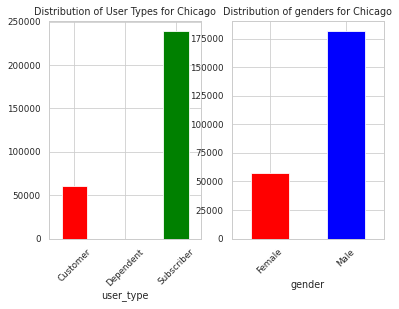

In [ ]:
plt.subplot(1,2,1)
groupby_user_chi = chicago_df.groupby('user_type').size()
groupby_user_chi.plot(kind='bar', title='Distribution of User Types for Chicago', rot=45, color=['red', 'blue', 'green']);

plt.subplot(1,2,2)
groupby_gender = chicago_df.groupby('gender').size()
groupby_gender.plot(kind='bar', title='Distribution of genders for Chicago', rot=45, color=['red', 'blue']);


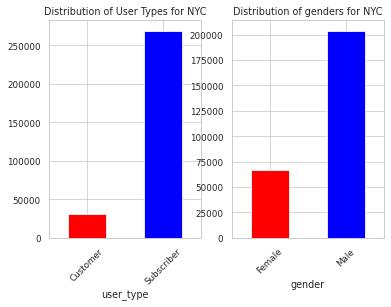

In [ ]:
# Let's plot the Distribution of genders for NYC
plt.subplot(1,2,1)
groupby_user_chi = new_york_city_df.groupby('user_type').size()
groupby_user_chi.plot(kind='bar',title='Distribution of User Types for NYC', rot=45, color=['red', 'blue', 'green']);

plt.subplot(1,2,2)
groupby_gender = new_york_city_df.groupby('gender').size()
groupby_gender.plot(kind='bar', title='Distribution of genders for NYC', rot=45, color=['red', 'blue'],);

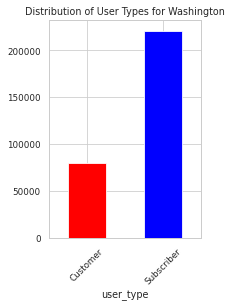

In [ ]:
# plotting the Distribution of genders for washington
plt.subplot(1,2,1)
groupby_user_chi = washington_df.groupby('user_type').size()
groupby_user_chi.plot(kind='bar',title='Distribution of User Types for Washington', rot=45, color= ['red', 'blue']);


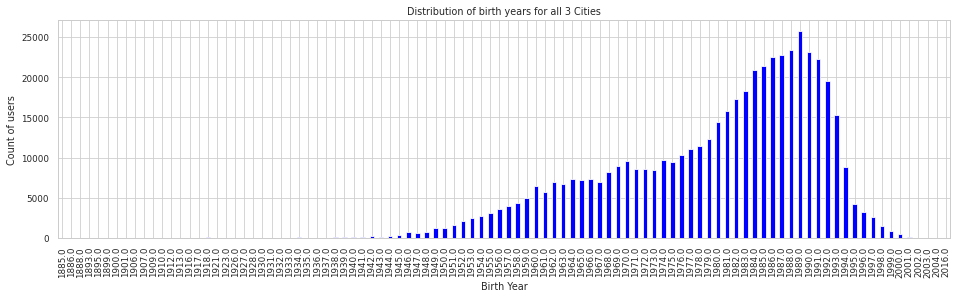

In [ ]:
# Also, let's see the Distribution of birth years for all 3 Cities
Bike_share_df = Bike_share_df.sort_values(by='birth_year')
groupby_birthyear = Bike_share_df.groupby('birth_year').size()
groupby_birthyear.plot(kind='bar', title='Distribution of birth years for all 3 Cities',color= 'blue' , figsize=(16,4));
plt.xlabel('Birth Year');
plt.ylabel('Count of users');

## Plotting the Distribution of Birth Years by Gender Type:

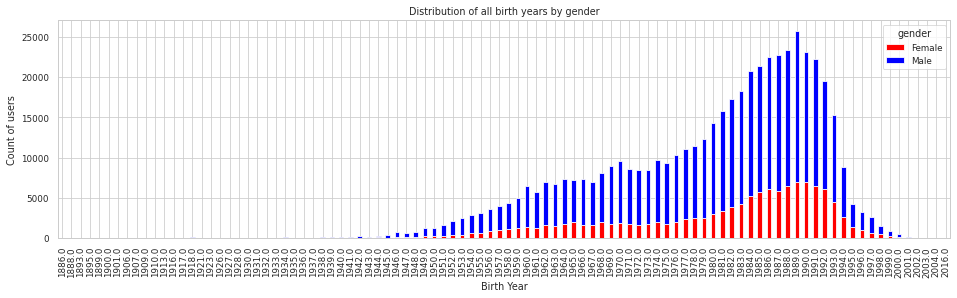

In [ ]:
groupby_birthyear_gender = Bike_share_df.groupby(['birth_year', 'gender'])['birth_year'].count().unstack('gender').fillna(0)
groupby_birthyear_gender.plot(kind='bar', title='Distribution of all birth years by gender', 
                              stacked=True, figsize=(16,4), color=['red', 'blue']);
plt.xlabel('Birth Year');
plt.ylabel('Count of users');

**Are you interested in seeing how the trips vary across date and time (i.e., a time series analysis)?**

Let's answer some questions:

What is the distribution of trips by month,day,week and hour?

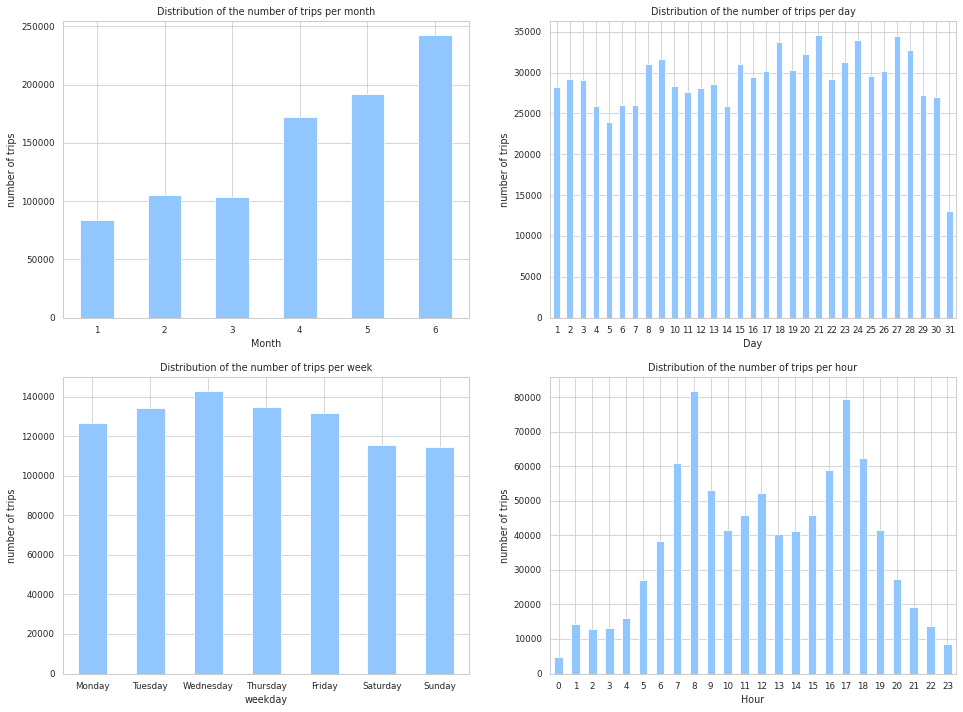

In [ ]:
data = Bike_share_df.set_index('start_time')
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
data.groupby(data.index.month)['trip_duration'].count().plot.bar(
    title='Distribution of the number of trips per month', rot=0)
plt.xlabel('Month');
plt.ylabel('number of trips');

plt.subplot(2,2,2)
data.groupby(data.index.day)['trip_duration'].count().plot.bar(
    title='Distribution of the number of trips per day', rot=0)
plt.xlabel('Day');
plt.ylabel('number of trips');

ax = plt.subplot(2,2,3)
data.groupby(data.index.weekday)['trip_duration'].count().plot.bar(
    title='Distribution of the number of trips per week', rot=0)
plt.xlabel('weekday');
plt.ylabel('number of trips');
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


plt.subplot(2,2,4)
data.groupby(data.index.hour)['trip_duration'].count().plot.bar(
    title='Distribution of the number of trips per hour', rot=0)
plt.xlabel('Hour');
plt.ylabel('number of trips');

## **Lastly, Let's plot the average trip duration per Age of users**

In [ ]:
#This is to Create the column 'Age'
import datetime
from dateutil.relativedelta import relativedelta

#To begin, we need to convert the values of our trip duration to hours
NYC_Chicago_df = pd.concat([chicago_df, new_york_city_df])
NYC_Chicago_df["trip_duration_hr"] = NYC_Chicago_df["trip_duration"]/60

#Then let's get the date for today
today = datetime.date.today()

#Now we can define a function that converts the year of birth to derive the actual age of users
def rowToAge(row):
   if row['birth_year'] > 0:
       birthDayOfPerson = datetime.datetime(row['birth_year'], row['month'], row['day'])
       age = relativedelta(today, birthDayOfPerson).years
       return age

#Assign this to a new column called 'Age'
NYC_Chicago_df['age'] = NYC_Chicago_df.apply(rowToAge, axis=1)

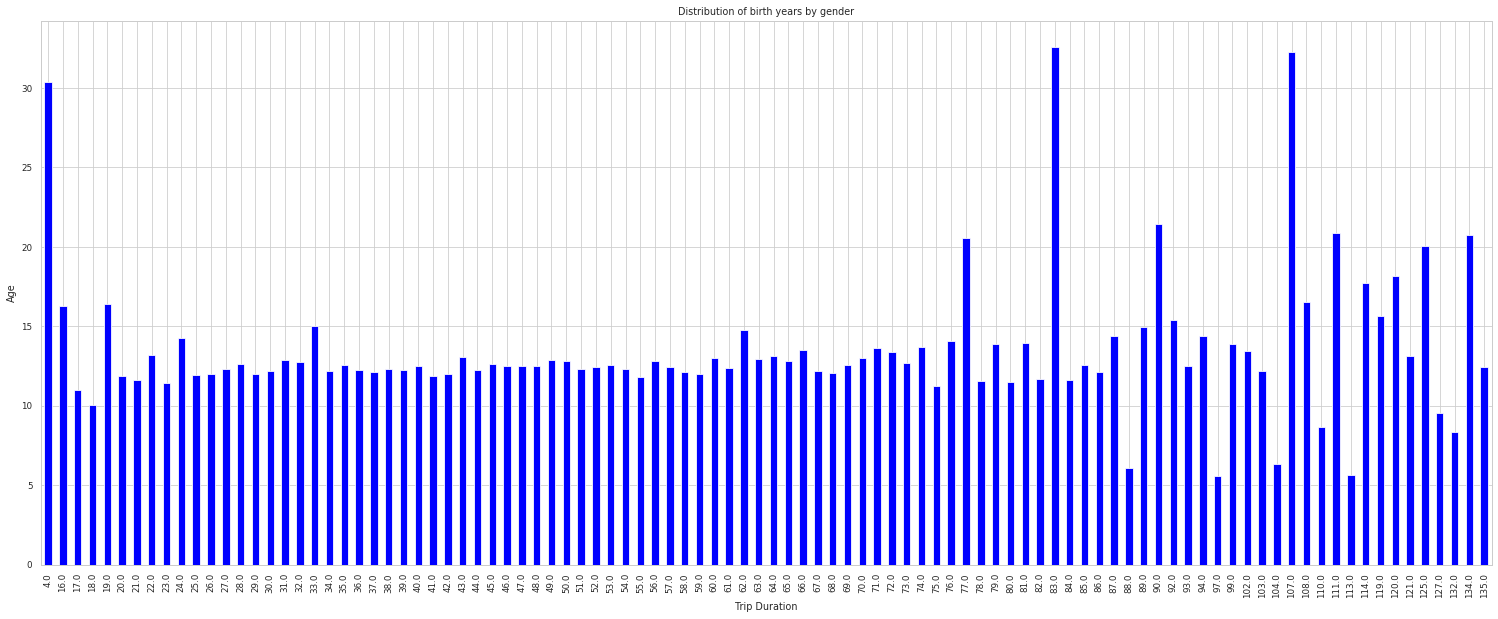

In [ ]:
#Finally, we can plot the distribution of the avergae trip per age of the user.
groupby_age_triDur = NYC_Chicago_df.groupby(['age'])['trip_duration_hr'].mean()

groupby_age_triDur.plot(kind='bar', title='Distribution of birth years by gender', 
                              stacked=False, figsize=(26,10), color=['blue']);
plt.xlabel('Trip Duration');
plt.ylabel('Age');


## **Conclusion**: 
The total Usage within January to June 2017 was 899308 with about 728824 Subscribers, 170483 Customers, and 1 Dependant. The data also clearly shows that we have more Subscribers than Customers in each of the months.
Also, we can say that the highest number of users were found in the month of june with a high number of millenials which are people born within the year 1981 and 1994. I found that the most common birth year and gender are people born in 1989 and 'Males'. Lastly, I also discovered that wednesdays have a higher record of bike usage while the most frequent hour of the day is at 8am and 5pm. 



## **Recommendation** 
Based on the insights gotten from this data, I can recommend that the company introduces loyalty programs that can convert their one time customers to active subscribers and increase  promotions on others days of the week that have less usage.
Another suggestion would be to generate more revenue for the company by placing externally sponsored advertisements on their platform (Application, website, etc.) on wednesdays which is the day of the week with the most usage. 
Lastly, increase promotions for the divvy bikes, targeting their major market segments (**"The Milllenials"**).